In [510]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [511]:
#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [512]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [513]:
data = pd.read_csv('/content/drive/MyDrive/ start/7004OTT Content Reviews.csv', encoding='UTF-8')
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [514]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 7003 
Total Positive Reviews: 3662 
Total Negative Reviews: 2261 
Total Neutral Reviews: 1080


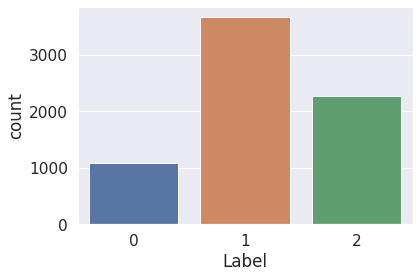

In [515]:
sns.countplot(data['Label'])

In [516]:
data.drop_duplicates(inplace=True)
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [517]:
#data.dropna(inplace=True)

In [518]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 6626 
Total Positive Reviews: 3414 
Total Negative Reviews: 2174 
Total Neutral Reviews: 1038


In [519]:
data.columns

Index(['Text', 'Label'], dtype='object')

In [520]:
# print some unprocessed reviews
sample_data = [10,100,150,222,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Text[i],'\n','Sentiment:-- ',data.Label[i],'\n')

আগুন লাগিয়ে দিলো এক ঝলকেই 
 Sentiment:--  0 

পুড়াই আগুন 
 Sentiment:--  1 

চঞ্চল চৌধুরী এবং সালাউদ্দিন লাভলু ধামাকা কিছু হবে অপেক্ষায় রইলাম ️️️ 
 Sentiment:--  1 

বাপরে বাপ! আগুন। দেখতে হবে। Another masterpiece will coming soon.. 
 Sentiment:--  1 

আমার কি প্রেম হবে না ১৮ বছর ধরে আমি সিঙ্গেল😞😞😞 
 Sentiment:--  0 

বাপরে আসলেই শ্বাসরুদ্ধকর ছিলো।এইটুকু দেখেই বোকের ভেতর ধড়পড় করছে জানিনা মুভিটা আরো কতোটা ভয়ংকর হবে।এই রকম মুভি আমার মতো দূর্বল চিত্তের মানুষের দেখা উচিত না। 
 Sentiment:--  1 

গল্প গুলা সুন্দর ছিল। বাংলায় এমন আরো অন্থরোলজি বানানো দরকার। 
 Sentiment:--  1 

পরিমনির কি চমৎকার আর সাবলীল অভিনয়। অভিনন্দন পরিমনি 
 Sentiment:--  1 

শ্যামল মাওলার কেনো ভয়েজ চেঞ্জ করা হয়েছে? 
 Sentiment:--  2 

শুরুতেই interest তৈরি হয়ে গেছে। 
 Sentiment:--  1 

গল্প গুলা সুন্দর ছিল। বাংলায় এমন আরো অন্থরোলজি বানানো দরকার। 
 Sentiment:--  1 

গল্পটা দারুন ছিল 
 Sentiment:--  1 

সর্বোচ্চ পর্যায়ের অভিনয় হয়েছে,,, ২০৭০ সালের জন্য রেখে গেলাম 
 Sentiment:--  1 

এই রকম কিছু দেখলে মনে হয়..যে দেশের মিড

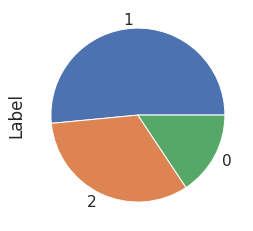

In [521]:
data['Label'].value_counts().plot(kind='pie')
plt.show()

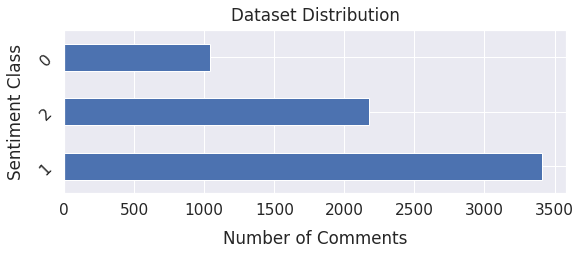

In [522]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


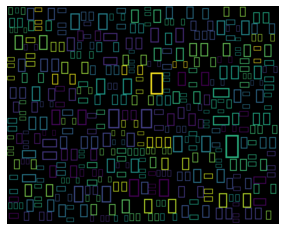

In [523]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

allWords = ' '.join([comnt for comnt in data['Text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [524]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Cleaning**

In [525]:
!pip install bangla-stemmer
#importing stemmer
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bangla_stemmer.stemmer import stemmer
import re
btokenizer = BasicTokenizer()

def clean_text(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    tokens = btokenizer.tokenize(text)
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(tokens)
    filtered = []
    for i in stm:
      
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
       
        filtered.append(i)
    
    return " ".join(filtered)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [526]:
# data['cleaned'] = data.Text.apply(clean_text)

**Apply The Function in to the Dataframe**

In [527]:
# Apply the function into the dataframe
data['cleaned'] = data['Text'].apply(clean_text)  

# print some cleaned reviews from the dataset
sample_data = [70,650,550,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Label[i],'\n')

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
ap

**After Preprocessing**

In [528]:
data

,Text,Label,cleaned
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1,পুরা অস্থির সাকিল চট্টগ্রাম
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1,পুরা আগুন অপেক্ষায় আছি টা দেখ
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...
...,...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2,প্রথমে মিষ্ এরপর পরকিয়া
6999,বৌদি কে লাগাবে,2,বৌদি লাগাবে
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0,সিরিজ টা পুরো কোথায় পাওয়া
7001,কাহিনীর গল্প খুব বাজে,2,কাহিনীর গল্প বাজে


**Remove Low length data**


In [529]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = data.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 6626


In [530]:
dataset=dataset[['cleaned','Label']]
dataset.head()

,cleaned,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস,1
2,পুরা আগুন অপেক্ষায় আছি টা দেখ,1
3,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...,1



**The summary of the reviews and words distribution in the dataset**

In [531]:
#Dataset Summary

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  1
Number of Documents:3414
Number of Words:26777
Number of Unique Words:5175
Most Frequent Words:

গান	732
ভালো	649
এক	593
অসাধারণ	529
সুন্দর	374
কর	333
অভিনয়	300
নাটক	284
আম	283
টা	271

Class Name :  2
Number of Documents:2174
Number of Words:18400
Number of Unique Words:5315
Most Frequent Words:

কর	397
ভালো	253
এক	243
নাটক	161
দেখ	128
দাখ	127
এসব	123
সিরিজ	122
আম	119
থেক	119

Class Name :  0
Number of Documents:1038
Number of Words:6340
Number of Unique Words:2255
Most Frequent Words:

কর	118
টা	91
দেখ	89
মুভি	83
আম	71
ভাই	68
এক	66
থেক	55
নাটক	54
চাই	54
Total Number of Unique Words:9377


**Dataset Summary Visualization**

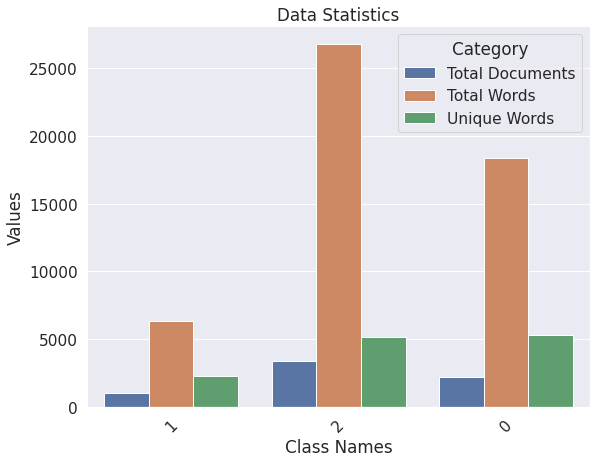

In [532]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(9,7))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

In [533]:
#dataset['abel']=dataset['label'].replace({'positive':1,'negative':0,'neutral':2})
#dataset.head()

In [534]:
#Labels=dataset.Label
#Labels

**Text Length Distribution**

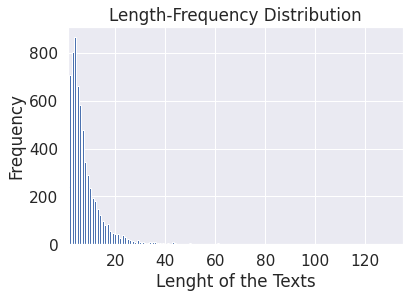

Maximum Length of a review: 156
Minimum Length of a review: 0
Average Length of a reviews: 8.0


In [535]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

**Using over-sampling to balance the dataset**

In [536]:
pcomment = dataset[dataset.Label == 1][:3414]
pcomment


,cleaned,Label,ReviewLength
0,পুরা অস্থির সাকিল চট্টগ্রাম,1,4
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস,1,9
2,পুরা আগুন অপেক্ষায় আছি টা দেখ,1,6
3,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস,1,5
4,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...,1,13
...,...,...,...
6479,দিক গুলো মন্দ ঢুকছেনা টা প্রথমে মাথায় ঢুক গেছ ...,1,29
6480,নাম দাখ ভেবেছি ভিউস কলক মানুষ রোমান্টিক দেখবেন...,1,11
6601,পাপ হইচই বেস্ট সিরিজ,1,4
6612,আম ২০২১ টা বেস্ট বছর অ্যাডিয়েন্স সেরার সেরাটা...,1,14


In [537]:
ncomment = dataset[dataset.Label == 2]
ncomment


,cleaned,Label,ReviewLength
31,টাক কপি পেস্ট চালায় দিল ক্রেডিট দিল,2,7
35,জাহান্নামী,2,1
39,ধীরগতির দাখ মজা পাই সময় নষ্ট হই,2,7
47,বাংলা সিনেম কথা লাভ,2,4
54,চাল একুরিয়ামে মাছ আছ আপাতত মাছ সিয়াম রান্না দাও,2,9
...,...,...,...
6620,সিনেমা বাস্তব আলাদা গুলো দেখলে বোজা,2,6
6621,প্রথমে মিষ্ এরপর পরকিয়া,2,4
6622,বৌদি লাগাবে,2,2
6624,কাহিনীর গল্প বাজে,2,3


In [538]:
nuecomment = dataset[dataset.Label == 0]
nuecomment


,cleaned,Label,ReviewLength
10,আগুন লাগা দিলো এক ঝলকে,0,5
15,বাংলাদেশ কিছুর আশা,0,3
24,অতি শ্রীগ্র শ্রীগ্র নিশো ভাই সিনেমায় দেখবো,0,7
26,আফরান নিশো বস শখ চুল কাট ফেলেছিল অপেক্ষ,0,8
29,আসবে,0,1
...,...,...,...
6613,গর্বিত বাঙালী বিশ্ব হৃদয় ছুত,0,5
6615,মুভি গুলো বোঝায় বাংলা ফিল্ম ইন্ডাস্ট্রি এক দি...,0,9
6616,বিয় থাক বিয় মাছ ব্যাং যায়,0,6
6619,মেয়ে জীবন টা বড় অদ্ভুত ছোট থেক বাবা মা কোলে ...,0,50


In [539]:
dataset = pd.concat([pcomment,ncomment,nuecomment], axis = 0)


**Feature Extraction Using TF-IDF**

In [540]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf1 = TfidfVectorizer() 
# X = tfidf1.fit_transform(dataset['cleaned'])
# y=dataset['Label'].values
# print("Shape of TF-IDF:",X.shape,'\n')
# Create a Vectorizer Object
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,3),tokenizer=lambda x: x.split())
X=vectorizer.fit_transform(data['Text'])
y=data['Label'].values
print("Shape of TF-IDF:",X.shape,'\n')


Shape of TF-IDF: (6626, 127954) 



In [541]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [542]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [543]:
X.shape

(10242, 127954)

In [544]:
y

array([1, 1, 1, ..., 2, 2, 2])

Class=1, n=3414 (33.333%)
Class=0, n=3414 (33.333%)
Class=2, n=3414 (33.333%)


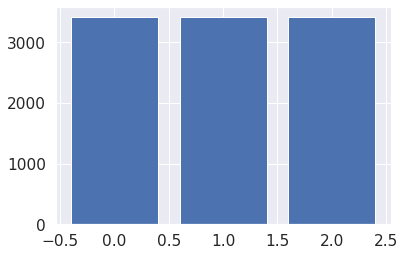

In [545]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [546]:
# review='পুরাই অস্থির সাকিল চট্টগ্রাম	'
# print("Sample Review: ",review)
# vector = tfidf1.transform([review])
# df = pd.DataFrame(vector.T.todense(), index=tfidf1.get_feature_names(), columns=["tfidf"])
# a = df.sort_values(by=["tfidf"],ascending=False)
# print(a[0:len(review.split())])

review='পুরাই অস্থির সাকিল চট্টগ্রাম	'
print("Sample Review: ",review)
vector = vectorizer.transform([review])
df = pd.DataFrame(vector.T.todense(), index=vectorizer.get_feature_names(), columns=["count"])
a = df.sort_values(by=["count"],ascending=False)
print(a[0:len(review.split())])

Sample Review:  পুরাই অস্থির সাকিল চট্টগ্রাম	
           count
অস্থির         1
সাকিল          1
পুরাই          1
চট্টগ্রাম      1


**Splitting Dataset**

In [547]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state =100)
print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (8193, 127954)
Shape of X_test: (2049, 127954)
Shape of Y_train: (8193,)
Shape of Y_test: (2049,)


In [548]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [549]:
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
prediction = lr.predict(xtest)
pred_prob1 = lr.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 72.28%


In [550]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# lr.predict(tf_comment)


In [551]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.63      0.89      0.73       707
           1       0.85      0.73      0.79       666
           2       0.77      0.54      0.64       676

    accuracy                           0.72      2049
   macro avg       0.75      0.72      0.72      2049
weighted avg       0.75      0.72      0.72      2049



In [552]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

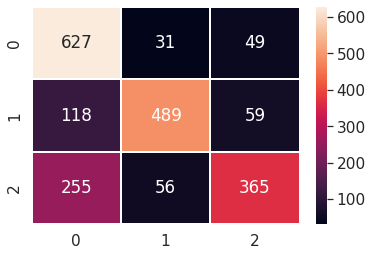

In [553]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [554]:
mn= MultinomialNB()
mn.fit(xtrain, ytrain)
prediction = mn.predict(xtest)
pred_prob1 = mn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 52.56%


In [555]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# mn.predict(tf_comment)


In [556]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.53      0.29      0.38       707
           1       0.43      0.76      0.55       666
           2       0.77      0.54      0.63       676

    accuracy                           0.53      2049
   macro avg       0.58      0.53      0.52      2049
weighted avg       0.58      0.53      0.52      2049



In [557]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

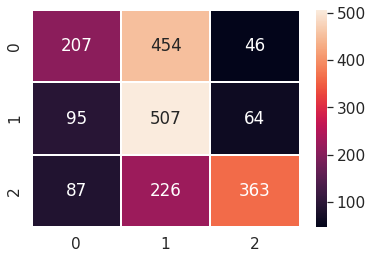

In [558]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [559]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [560]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3

In [561]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_prob1[:,i], pos_label=i)

In [562]:
pred_prob0 = lr.predict_proba(xtest)[:,1]
fpr0 , tpr0, thresholds0 =metrics.roc_curve(ytest, pred_prob0,pos_label=1)

In [563]:
pred_prob1 = mn.predict_proba(xtest)[:,1]

In [564]:
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, pred_prob1,pos_label=1)

In [565]:
knn= KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn.fit(xtrain, ytrain)
prediction = knn.predict(xtest)
pred_prob2 = knn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 48.61%


In [566]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# knn.predict(tf_comment)

In [567]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.44      0.92      0.60       707
           1       0.95      0.14      0.24       666
           2       0.52      0.38      0.44       676

    accuracy                           0.49      2049
   macro avg       0.64      0.48      0.43      2049
weighted avg       0.63      0.49      0.43      2049



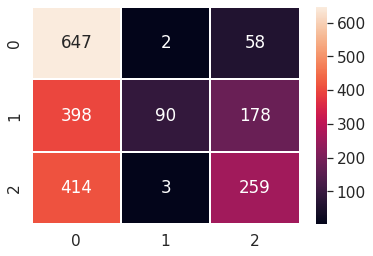

In [568]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [569]:
pred_prob2 = knn.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 =metrics.roc_curve(ytest, pred_prob2,pos_label=1)

In [570]:
lsvm= SVC(kernel="linear", probability=True)
lsvm.fit(xtrain, ytrain)
prediction = lsvm.predict(xtest)
pred_prob3 = lsvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 67.94%


In [571]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# lsvm.predict(tf_comment)


In [572]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.58      0.90      0.70       707
           1       0.82      0.70      0.76       666
           2       0.77      0.43      0.55       676

    accuracy                           0.68      2049
   macro avg       0.72      0.68      0.67      2049
weighted avg       0.72      0.68      0.67      2049



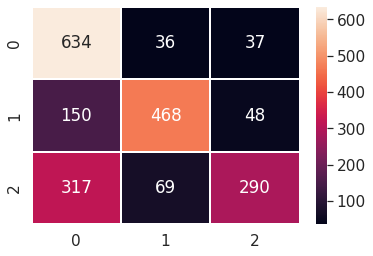

In [573]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [574]:
pred_prob3 = mn.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 =metrics.roc_curve(ytest, pred_prob3,pos_label=1)

In [575]:
ksvm= SVC(kernel = 'rbf',probability=True)
ksvm.fit(xtrain, ytrain)
prediction = ksvm.predict(xtest)
pred_prob4 = ksvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 65.30%


In [576]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# ksvm.predict(tf_comment)


In [577]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.60      0.83      0.69       707
           1       0.69      0.78      0.73       666
           2       0.74      0.34      0.47       676

    accuracy                           0.65      2049
   macro avg       0.68      0.65      0.63      2049
weighted avg       0.68      0.65      0.63      2049



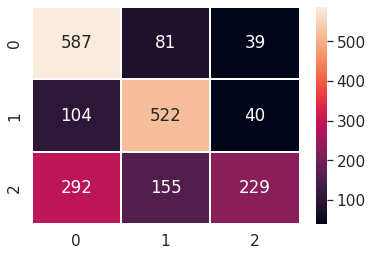

In [578]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [579]:
pred_prob4 = ksvm.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 =metrics.roc_curve(ytest, pred_prob4,pos_label=1)

In [580]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
prediction = dt.predict(xtest)
pred_prob5 = dt.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 64.08%


In [581]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# dt.predict(tf_comment)


In [582]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.57      0.85      0.68       707
           1       0.76      0.63      0.69       666
           2       0.67      0.43      0.52       676

    accuracy                           0.64      2049
   macro avg       0.66      0.64      0.63      2049
weighted avg       0.66      0.64      0.63      2049



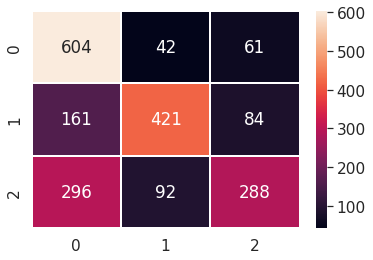

In [583]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [584]:
pred_prob5 = dt.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 =metrics.roc_curve(ytest, pred_prob5,pos_label=1)

In [585]:
rf = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf.fit(xtrain, ytrain)
prediction = rf.predict(xtest)
pred_prob6 = rf.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))


Accuracy: 68.86%


In [586]:
# comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
# tf_comment = tfidf1.transform(comment)
# rf.predict(tf_comment)


In [587]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       707
           1       0.85      0.67      0.74       666
           2       0.70      0.52      0.59       676

    accuracy                           0.69      2049
   macro avg       0.72      0.69      0.68      2049
weighted avg       0.71      0.69      0.68      2049



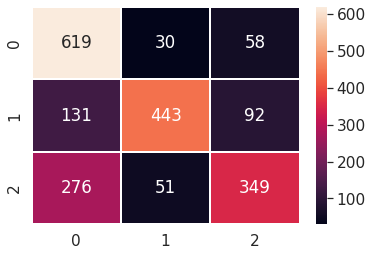

In [588]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [589]:
pred_prob6 = rf.predict_proba(xtest)[:,1]
fpr6 , tpr6, thresholds6 =metrics.roc_curve(ytest, pred_prob6,pos_label=1)

In [590]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
prediction = xgb.predict(xtest)
pred_prob5 = xgb.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 75.70%


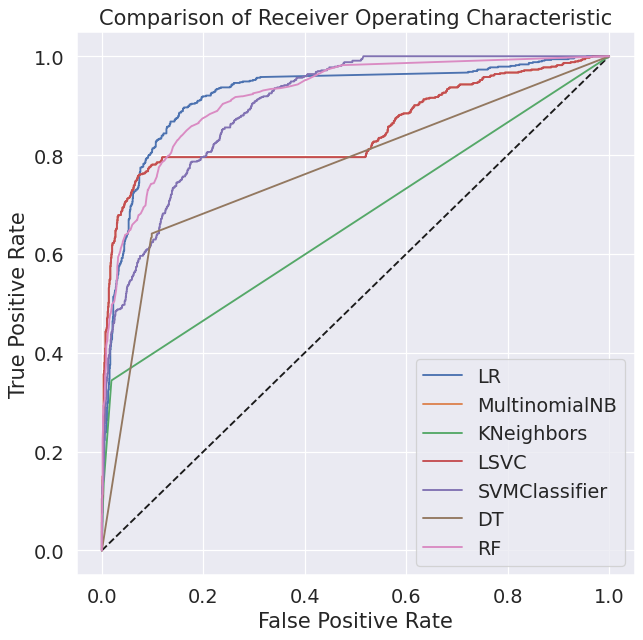

In [591]:
plt.figure(figsize=(8, 8), dpi=90)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr0, tpr0, label= "LR" )
plt.plot(fpr1, tpr1, label= "MultinomialNB" )
plt.plot(fpr2, tpr2, label= "KNeighbors" )
plt.plot(fpr3, tpr3, label= "LSVC" )
plt.plot(fpr4, tpr4, label= "SVMClassifier")
plt.plot(fpr5, tpr5, label= "DT")
plt.plot(fpr6, tpr6, label= "RF")


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comparison of Receiver Operating Characteristic')
plt.show()